# Methods Optimisation Realisation

## Methods of first order

### SimpleGradientDescent

First task

In [5]:
import numpy as np
from opt_project import task_1
from opt_project.methods.first_order_methods import simple_gd
from opt_project.methods.first_order_methods.step_sizes import ArmijoStepSize
from opt_project.methods.first_order_methods.step_sizes import ConstantStepSize
from opt_project.stop_criterias import ydiff_stop_crit

a = np.array([1., 0., 0.])
b = np.array([1,])
F = np.array([
    [76.3402909013, 27.3236913435, 10.0695823542],
    [-27.5962812192, -62.9012921655, 17.7348207564],
    [-26.2012001069, 19.1239055741, 58.1525657745],
    [-22.5428095751, 16.4536952479, -85.9569688851]
])
g = np.array([
    295.7266088536,
    206.8060288566,
    22.2680415867,
    19.1588255138
])

oracle = task_1.first_order_oracle(a, b)
constraints = task_1.constraints(F, g)
criteria = ydiff_stop_crit(0.0001)

gradient_descent_task = simple_gd(oracle, constraints)
gradient_descent_task.set_init_position(np.array([0.,0.,0.]))
stp_size = ArmijoStepSize(oracle, constraints,init_alpha=1)
gradient_descent_task.set_step_size(stp_size)

result = gradient_descent_task.make(criteria)
result.ShowIterations("Iterations")
result.ShowTime("ErrorTimeGraphic")
exact_solution = np.array([6.941866360728454, -7.303665236134947, -3.441492677150564])
result.InitializeExactSolution(exact_solution)
result.ShowTime("ErrorTimeGraphicWithRespectToExactSolution")



[1. 0. 0.]
[2. 0. 0.]
[3. 0. 0.]


TypeError: projection() got an unexpected keyword argument 'save_state'

Second task

In [1]:
import numpy as np
from opt_project.methods.first_order_methods.step_sizes import ConstantStepSize
from opt_project.methods.first_order_methods.step_sizes import ArmijoStepSize
from opt_project.stop_criterias import ydiff_stop_crit
import numpy as np
from opt_project import task_2
from opt_project.methods.first_order_methods import simple_gd
from opt_project.stop_criterias import iteration_stop_crit

F = np.array([
    [-1, 1],
    [1, -1],
    [0, 1],
    [1, 0]
])
g = np.array([1, 1, 3, 3])
a = np.array([1, 1])
b = 1
c = np.array([1, 1])
d = 1

oracle = task_2.first_order_oracle()
constraints = task_2.constraints(F, g, a, b, c, d)
init_point = constraints.initialise()
criteria = ydiff_stop_crit(0.00001)


gradient_descent_task = simple_gd(oracle, constraints)
gradient_descent_task.set_init_position(init_point)
stp_size = ConstantStepSize(alpha = 0.1)
stp_size = ArmijoStepSize(oracle, constraints, init_alpha = 0.3)
gradient_descent_task.set_step_size(stp_size)

result = gradient_descent_task.make(criteria)
result.Show()
result.ShowTime()

[7. 7.]
[6.15817709 6.15817709]
[6.16138929 6.16138929]
[6.16459801 6.16459801]
[6.16780326 6.16780326]
[6.17100505 6.17100505]
[6.17420339 6.17420339]
[6.17739829 6.17739829]
[6.18058975 6.18058975]
[6.18377779 6.18377779]
[6.18696241 6.18696241]
[6.19014363 6.19014363]
[6.19332146 6.19332146]
[6.1964959 6.1964959]
[6.19966696 6.19966696]
[6.20283466 6.20283466]
[6.20599899 6.20599899]
[6.20915998 6.20915998]
[6.21231762 6.21231762]
[6.21547194 6.21547194]
[6.21862293 6.21862293]
[6.22177061 6.22177061]
[6.22491498 6.22491498]
[6.22805606 6.22805606]
[6.23119385 6.23119385]
[6.23432836 6.23432836]
[6.2374596 6.2374596]
[6.24058758 6.24058758]
[6.24371231 6.24371231]
[6.2468338 6.2468338]
[6.24995205 6.24995205]
[6.25306707 6.25306707]
[6.25617888 6.25617888]
[6.25928748 6.25928748]
[6.26239287 6.26239287]
[6.26549508 6.26549508]
[6.26859409 6.26859409]
[6.27168994 6.27168994]
[6.27478261 6.27478261]
[6.27787213 6.27787213]
[6.2809585 6.2809585]
[6.28404172 6.28404172]
[6.28712181 6.28

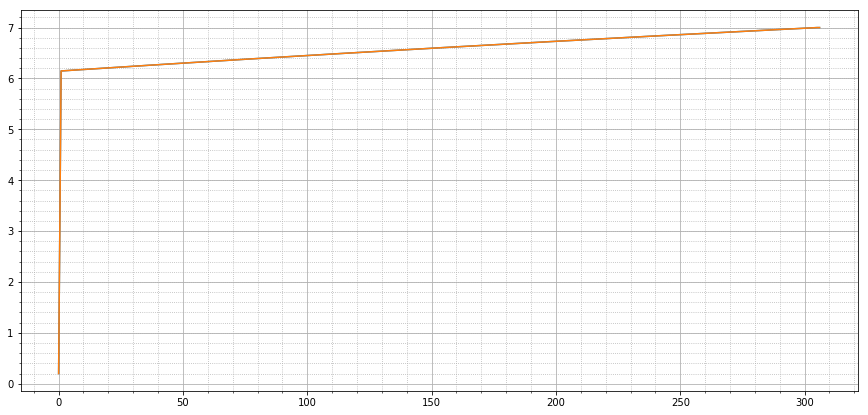

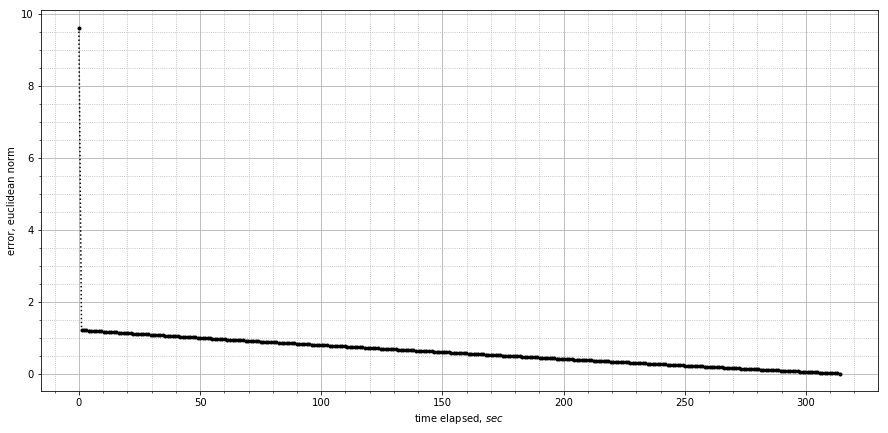

In [3]:
result.Show()
result.ShowTime()